In [1]:
using Plots

## Silica Model

Here is the piecewise functions for the Q-units in the silica glass model, as well as some definitions for the bridging oxygen

In [2]:
j_to_x(j) = j / (j + 1)
x_to_j(x) = x / (1 - x)

struct Glass
    Q4::Float64
    Q3::Float64
    Q2::Float64
    Q1::Float64
    Q0::Float64
end

function Glass(c; notation = "x")
    if notation == "j"
        glass = Glass(j_to_x(c))
    else
        Q4 = 0 <= c < 1 / 3 ? 1 - 3 * c : 0
        Q3 = 0 < c <= 1 / 3 ? 2 * c : 1 / 3 < c < 1 / 2 ? 2 - 4 * c : 0
        Q2 = 1 / 3 < c <= 1 / 2 ? 3 * c - 1 : 1 / 2 < c < 3 / 5 ? 3 - 5 * c : 0
        Q1 = 1 / 2 < c <= 3 / 5 ? 4 * c - 2 : 3 / 5 < c < 2 / 3 ? 4 - 6 * c : 0
        Q0 = 3 / 5 < c < 2 / 3 ? 5 * c - 3 : 0
        glass = Glass(Q4, Q3, Q2, Q1, Q0)
    end
    return glass
end   

total(g::Glass) = g.Q4 + g.Q3 + g.Q2 + g.Q1 + g.Q0
BO(g::Glass) = (4 * g.Q4 + 3 * g.Q3 + 2 * g.Q2 + g.Q1) / total(g)
NBO(g::Glass) = 4 - BO(g);

## n

Here is information on the number of units in the graph, plotted for both j and x

In [10]:
xrange = 0:1/1000:2/3;
xglasses = Glass.(xrange)
jrange = x_to_j.(xrange)
jglasses = Glass.(jrange, notation  = "j");

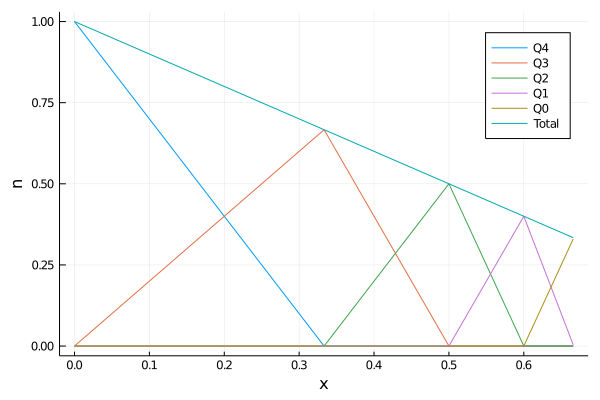

In [4]:
plot(xrange, (g->g.Q4).(xglasses), label = "Q4", xlabel = "x", ylabel = "n")
plot!(xrange, (g->g.Q3).(xglasses), label = "Q3")
plot!(xrange, (g->g.Q2).(xglasses), label = "Q2")
plot!(xrange, (g->g.Q1).(xglasses), label = "Q1")
plot!(xrange, (g->g.Q0).(xglasses), label = "Q0")
plot!(xrange, total.(xglasses), label = "Total")

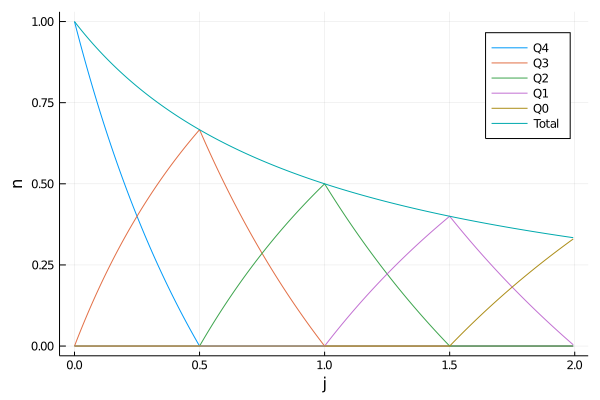

In [5]:
plot(jrange, (g->g.Q4).(jglasses), label = "Q4", xlabel = "j", ylabel = "n")
plot!(jrange, (g->g.Q3).(jglasses), label = "Q3")
plot!(jrange, (g->g.Q2).(jglasses), label = "Q2")
plot!(jrange, (g->g.Q1).(jglasses), label = "Q1")
plot!(jrange, (g->g.Q0).(jglasses), label = "Q0")
plot!(jrange, total.(jglasses), label = "Total")

## f

Here is information for the fractions of each unit in the glass, plotted here using both j and x

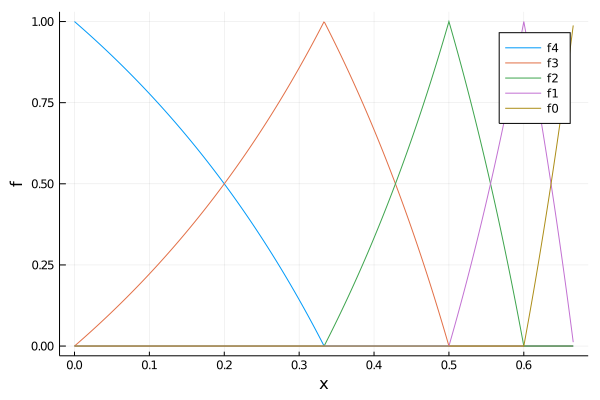

In [6]:
plot(xrange, (g->g.Q4).(xglasses) ./ total.(xglasses), label = "f4", xlabel = "x", ylabel = "f")
plot!(xrange, (g->g.Q3).(xglasses) ./ total.(xglasses), label = "f3")
plot!(xrange, (g->g.Q2).(xglasses) ./ total.(xglasses), label = "f2")
plot!(xrange, (g->g.Q1).(xglasses) ./ total.(xglasses), label = "f1")
plot!(xrange, (g->g.Q0).(xglasses) ./ total.(xglasses), label = "f0")

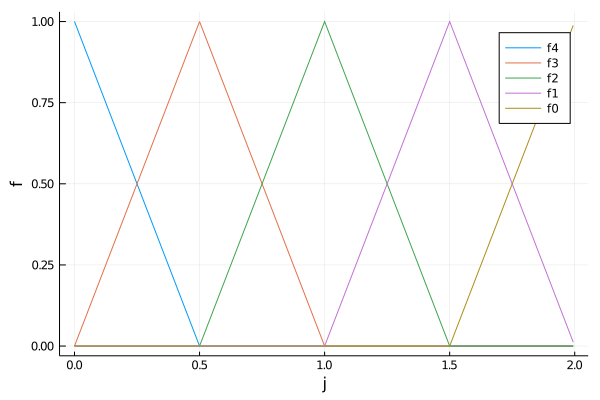

In [7]:
plot(jrange, (g->g.Q4).(jglasses) ./ total.(jglasses), label = "f4", xlabel = "j", ylabel = "f")
plot!(jrange, (g->g.Q3).(jglasses) ./ total.(jglasses), label = "f3")
plot!(jrange, (g->g.Q2).(jglasses) ./ total.(jglasses), label = "f2")
plot!(jrange, (g->g.Q1).(jglasses) ./ total.(jglasses), label = "f1")
plot!(jrange, (g->g.Q0).(jglasses) ./ total.(jglasses), label = "f0")

## Bridging Oxygen

Here is information about the number of bridging oxygens vs. non-bridging oxygens, again plotted against both j and x

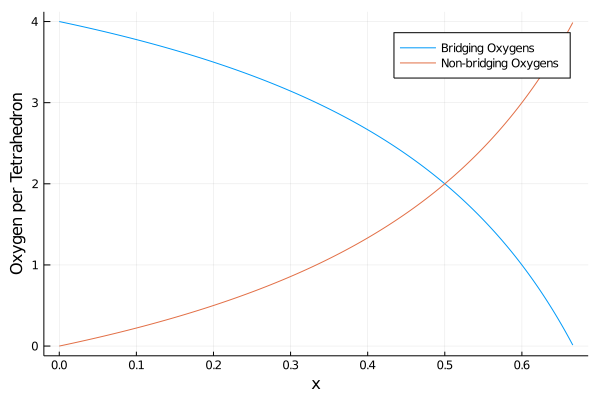

In [8]:
plot(xrange, BO.(xglasses), label = "Bridging Oxygens", xlabel = "x", ylabel = "Oxygen per Tetrahedron")
plot!(xrange, NBO.(xglasses), label = "Non-bridging Oxygens")

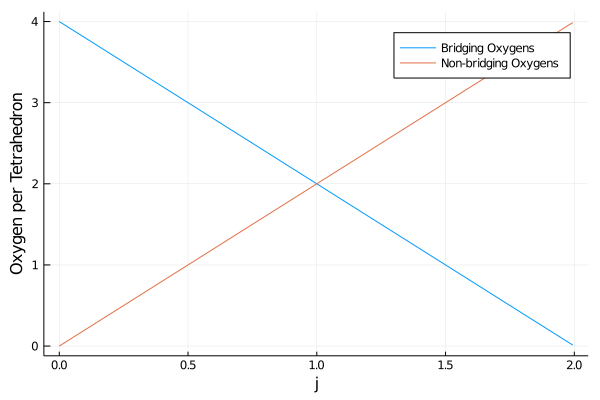

In [9]:
plot(jrange, BO.(jglasses), label = "Bridging Oxygens", xlabel = "j", ylabel = "Oxygen per Tetrahedron")
plot!(jrange, NBO.(jglasses), label = "Non-bridging Oxygens")